In [3]:
import pandas as pd 
import numpy as np
import keras 
np.random.seed(2)


Using TensorFlow backend.


In [4]:
data= pd.read_csv('creditcard.csv')

In [5]:
## Data Exploration
data.head()
# the class column tell us if the transaction is a fraudulant one or not 
# 1 being it is and 0 being a normal one 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
# data Preprocessing
# we are going to normalize the range (-1,1)
from sklearn.preprocessing import StandardScaler 
data['normalizedAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# now we drop the orginal column
data = data.drop(columns=['Amount'],axis=1)

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
data= data.drop(['Time'],axis=1)

In [10]:
# now we are going to split our data into X-input and Y-output
X = data.iloc[:, data.columns!='Class'] # we take everything beside the class column
y= data.iloc[:, data.columns=='Class'] # we take just the column Class


In [11]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338516


In [12]:
y

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [13]:
# Deep Learning : Supervised technique
# first thing we are going to do is to do a Feature Extraction 
# to extract the most relevant features for our model 

## activation functions 
# since the result is either one or zero.
# it means we can use a step function in our perceptron

# the sigmoid function is similar to the step function but it is softer in the transaction
# from zero to one

# RELU FUNCTION : Rectify linear unit 
# this function returns as an output a zero value for any negative value 
# and returns the value itself if it is positive 
# usueful when dealing with images 


# we will use the sigmoid function and the relu function 

# the process of calculating the input that we will use is called 
# feed forward
# cycle goes like: feed-forward --> compare prediction with expected output
# --> calculate error --> back propagation --> update weights --> iterate 

# we will train for an accuracy and an amount of epochs
# given that we have a big data sample it will hard to iterate for epoch of 100 times 
# as it will take to much time to 100* data sample 

# so we will define a Batch size

# when the model is underfitting it means it is too simple to be compared in the real world 
# when it is overfitting it means it is too complex to be used as well 

# it is easier to deal with underfitting models as you can always add layers to your model 
# or keep training 

# but it is very difficult to make the computer forget what it learned in the case 
# of overfitting.

# one of the most popular techniques used to deal with this problem is 
# the drop out technique 
# what it does is that it turns off  random weights  from the network in the learning 
# process, this will turn off pre-dominate features during training and will allow other 
# weights to train themselves

# when defining the dropout layer , we need to define the probability that each layer 
# could be turned off  - number btwn zero and one-

# since we have a highly unbalanced dataset due to the amount of fraud being to little in comparaison 
# with the total amount of normal transacttion 
# we are more likely to overfit our model 


In [14]:
# splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [15]:
X_train.shape

(199364, 29)

In [16]:
X_test.shape

(85443, 29)

In [17]:
# next thing we are going to transform our data set into a numpy array ]
X_train =np.array(X_train)
X_test =np.array(X_test)
y_train=np.array(y_train)
y_train=np.array(y_train)

In [18]:
# now we are going to create the deep neural network 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [19]:
# we will define our model 
# we are going to use multiple Dense layers in our model 
# and we are also going to use dropout layers in the middle to avoid overfitting
# the amount of Dense layers used depends on the necessity 
# and so we are going to mesure our result and if we need to add layers 
# we will then use it.

# we will also be using Relu activation function for all the layers excepet the last one.
# because we are doing a binary classification problem

# we need to tell the nerual network how many layers to expect as input
# and that must match our number of colums/ Features

# and we also have a single node in our last layer '1' and that represent the probability that our transcation 
# is fraudulant or not

# and in the other layers we can have as many nodes as we see necessary: units
# the dropout is given 50% change of probability 
# meaning each node have a fifty change that it weight might be turned off

model = Sequential([
    Dense(units=16,input_dim=29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1,activation='sigmoid'),
    
])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [21]:
 ## now we will start training the model
    ## we use adam optimizer 

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 12s 59us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 15s 77us/step - loss: 0.0040 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 14s 68us/step - loss: 0.0037 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 13s 65us/step - loss: 0.0034 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 13s 65us/step - loss: 0.0034 - acc: 0.9994


In [22]:
# now we will try to measure the results 
# we will use the X_test with the evaluate method
score = model.evaluate(X_test,y_test)


85443/85443 [==============================] - 1s 12us/step


In [23]:
score

[0.004034261053283878, 0.9993679997191109]

In [24]:
# metrics 
# we will use a confusion metrix to see how our model is performing 

# in training we try to maximize our accuracy and recall 
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
# first we need to have the y_predictions 
y_pred= model.predict(X_test)
y_test=pd.DataFrame(y_test)


In [26]:
cnf_matrix = confusion_matrix(y_test,y_pred.round())

Confusion matrix, without normalization
[[85276    20]
 [   34   113]]


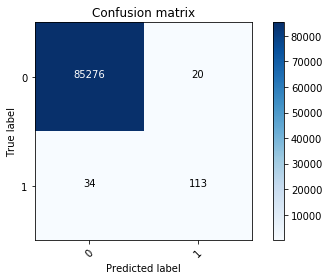

In [27]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [28]:
# now let us apply the confusion matrix to all the dataset 
y_pred = model.predict(X)

In [29]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284246     69]
 [   104    388]]


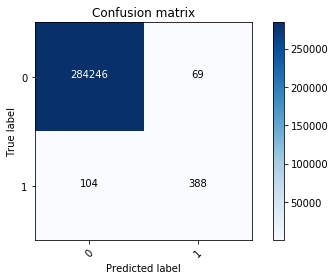

In [30]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [31]:
# since we are dealing with discret values we are using classifiers 

# we will be using Support Vector Machines -SVM
# SVM, will try to detect what is the best line to classify the two classes 

# we will be using two dimensions
# the best line si the one that maximizes distance from the line to the points of each class 

# in more dimensions it finds the best Hyperplane 

# decision trees also solve classification problems as regression problems 
# a tree is built recursively using cost functions to find best splits at each node
# once the tree is built, you can use it to find predictions
# Pruning is used to avoid overfitting


# another technique we can use Random Forest

# another technique we can use is K Nearest Neighbours : Lazy Algorithm 
# it looks at closest point to define the label 
# it can cassify mutliple classes 

# How it works:
# A number K is selected 
# K items that are closer to the new sample are selected 
# find the most frequent class among k items 
# prediction is the most frequent class 




In [32]:
# Random Forest


In [33]:
from sklearn.ensemble import RandomForestClassifier


In [34]:
random_forest = RandomForestClassifier(n_estimators=100) 

In [35]:
# 100 represent how complex our algorithm is going to be 
random_forest.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
y_pred = random_forest.predict(X_test)

In [37]:
random_forest.score(X_test,y_test)

0.9995084442259752

In [38]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [39]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


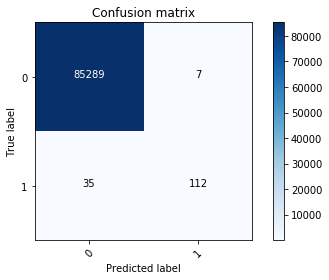

In [40]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [41]:
y_pred = random_forest.predict(X)

In [42]:
cnf_matrix = confusion_matrix(y,y_pred.round())

Confusion matrix, without normalization
[[284308      7]
 [    35    457]]


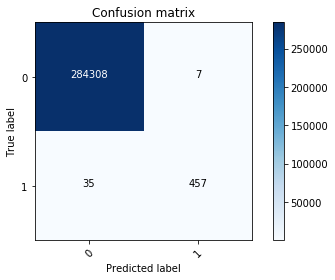

In [43]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [44]:
# decision Trees
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [45]:
decision_tree.fit(X_train,y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
y_pred = decision_tree.predict(X_test)

In [47]:
decision_tree.score(X_test,y_test)

0.9992275552122467

In [48]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [49]:
y_pred = decision_tree.predict(X)

In [50]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284285     30]
 [    36    456]]


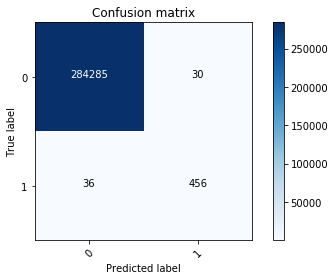

In [51]:
cnf_matrix= confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [52]:
# since we have an unbalanced dataset we need to apply some samplying techniques 
# sampling Example :
# Given a dataset with 6 male and 3 female i can get a balanced sample by:
# undersample: 3 female + 3 out of 6 male
# Oversample: 6 male + twice the 3 females 

In [53]:
# undersampling 
# we start by calculating the number of fraud data we have 
fraud_indices =np.array(data[data.Class ==1].index)
number_records_fraud= len(fraud_indices)
number_records_fraud

492

In [54]:
# we do the same for non fraud data 
normal_indices = data[data.Class ==0].index

In [55]:
# now from the normal indices we will select a random sample
# with the same length as our fraud dataset = 492
random_normal_indices= np.random.choice(normal_indices, number_records_fraud, replace=False)

# we will also need to transform that into a numpy array 
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

492


In [56]:
# we concatenate the two sample
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

print (len(under_sample_indices))

984


In [57]:
under_sample_data = data.iloc[under_sample_indices,:]

In [58]:
# we split our data into X and y 
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns== 'Class']

In [59]:
# we split our data into train and test data set 
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size= 0.3)

In [60]:
# we transform the data into a numpy array
X_train = np.array(X_train)
X_test= np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [61]:
# we verify that our model remains unchanged 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [62]:
 ## now we will start training the model
    ## we use adam optimizer 

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 0s 545us/step - loss: 0.5301 - acc: 0.9084
Epoch 2/5
688/688 [==============================] - 0s 68us/step - loss: 0.2318 - acc: 0.9215
Epoch 3/5
688/688 [==============================] - 0s 72us/step - loss: 0.1884 - acc: 0.9259
Epoch 4/5
688/688 [==============================] - 0s 72us/step - loss: 0.1745 - acc: 0.9302
Epoch 5/5
688/688 [==============================] - 0s 59us/step - loss: 0.1631 - acc: 0.9390


Confusion matrix, without normalization
[[147   0]
 [ 20 129]]


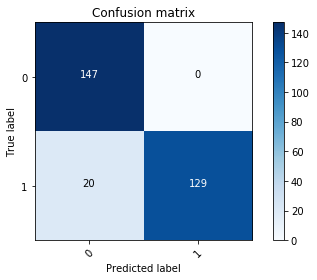

In [63]:
y_pred = model.predict(X_test)
y_expected =pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284073    242]
 [    63    429]]


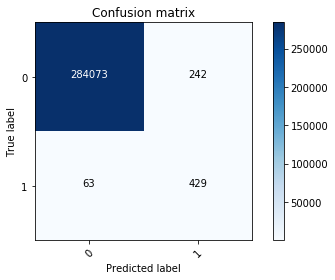

In [64]:
y_pred = model.predict(X)
y_expected =pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [67]:

# SMOTE Sampling  : Oversampling technique

#pip install imbalanced-learn

from imblearn.over_sampling import SMOTE


In [69]:
X_resample, y_resample= SMOTE().fit_sample(X,y.values.ravel())

In [70]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [71]:
X_train, X_test, y_train, y_test= train_test_split(X_resample,y_resample,test_size=0.3)

In [72]:
# we transform the data into a numpy array
X_train = np.array(X_train)
X_test= np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [73]:
 ## now we will start training the model
    ## we use adam optimizer 

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 24s 61us/step - loss: 0.0356 - acc: 0.9876
Epoch 2/5
398041/398041 [==============================] - 24s 60us/step - loss: 0.0142 - acc: 0.9963
Epoch 3/5
398041/398041 [==============================] - 25s 63us/step - loss: 0.0113 - acc: 0.9972
Epoch 4/5
398041/398041 [==============================] - 25s 64us/step - loss: 0.0096 - acc: 0.9978 0s - loss: 0.0096 - acc: 0.99
Epoch 5/5
398041/398041 [==============================] - 25s 64us/step - loss: 0.0086 - acc: 0.9980


Confusion matrix, without normalization
[[85145   192]
 [   72 85180]]


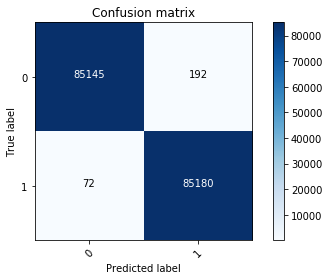

In [74]:
# it took more time to train the trainingset because now we have more
# data , because we did an overfitting

y_pred = model.predict(X_test)
y_expected =pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283709    606]
 [     6    486]]


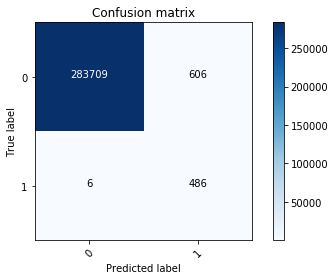

In [75]:
y_pred = model.predict(X)
y_expected =pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
# we notice now that the amount of fraud transcation that we missed 
# is very small compared to the dataset and that is really good.